# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

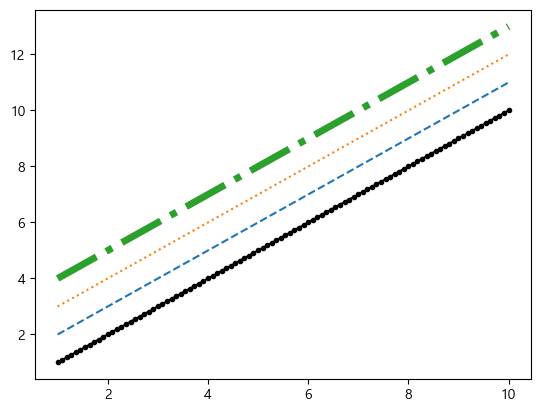

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.linspace(1, 10, num=100)  # 1 ~ 10을 100등분(num) 한 분위값으로 이뤄진 1차원 배열을 생성.
x2 = pd.Series(x)
# plt 함수를 이용해서 선그래프 그리기.
plt.plot(x, x, marker='.', color='black')
plt.plot(x, x+1, linestyle='--')
plt.plot(x, x+2, linestyle=':')
plt.plot(x, x+3, linestyle='-.', linewidth=5)
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [12]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   년도           12 non-null     int64
 1   주의보 발령횟수     12 non-null     int64
 2   주의보 발령일수     12 non-null     int64
 3   경보 발령횟수      12 non-null     int64
 4   경보 발령일수      12 non-null     int64
 5   관측일수         12 non-null     int64
 6   최대농도(㎍/㎥/시)  12 non-null     int64
dtypes: int64(7)
memory usage: 800.0 bytes


In [18]:
df.columns[-1]

'최대농도(㎍/㎥/시)'

In [20]:
# '최대농도(㎍/㎥/시)' => '최대농도'
# df.rename(columns = {'최대농도(㎍/㎥/시)':'최대농도'})
df.rename(columns = {df.columns[-1]:'최대농도'}, inplace=True)

In [21]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


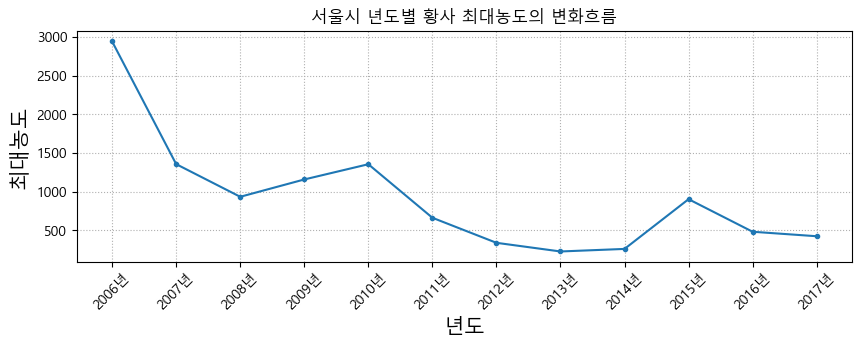

In [49]:
# 년도에 따른 황사 최대 농도의 변화흐름
plt.figure(figsize=(10,3))
plt.plot(df['년도'], df['최대농도'], marker='.')
plt.title('서울시 년도별 황사 최대농도의 변화흐름')
plt.xlabel('년도', fontsize=15)
plt.ylabel('최대농도', fontsize=15)

plt.xticks(df['년도'], 
           labels=[str(y)+'년'  for y in df['년도']],  # tick 라벨의 size == ticks의 size
           rotation=45
          )  # 눈금의 위치. labels=ticks라벨에 사용할 문자열 리스트
plt.grid(True, linestyle=':')


plt.show()

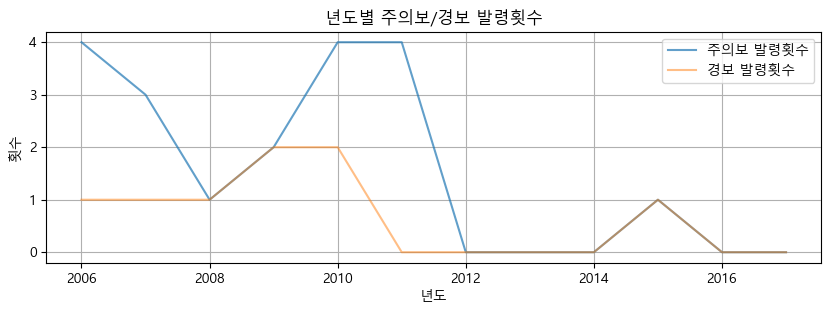

In [56]:
# 년도에 따른 주의보/경보 발령횟수의 변화 ==> 하나의 subplot(axes) 에 같이 그리기.
plt.figure(figsize=(10, 3))

plt.plot(df['년도'], df['주의보 발령횟수'], alpha=0.7, label='주의보 발령횟수') #alpha=투명도 : 0(투명) ~ 1(불투명)
plt.plot(df['년도'], df['경보 발령횟수'], alpha=0.5, label='경보 발령횟수')

plt.title('년도별 주의보/경보 발령횟수')
plt.xlabel('년도')
plt.ylabel('횟수')

plt.legend()  #  범례나오도록 처리.
plt.grid(True)
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

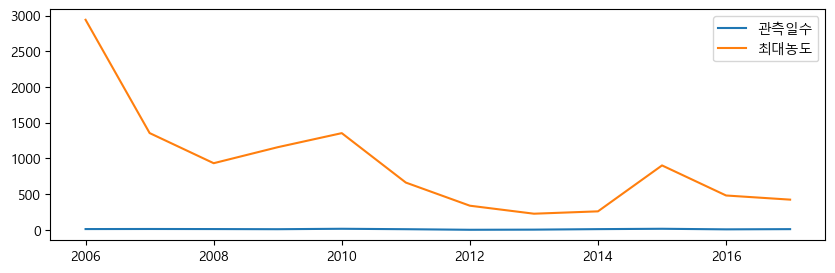

In [62]:
# 년도별 관측일수와 최대농도의 변화흐름을 하나의 axes에 그리기.
# X: 년도, Y: 관측일수, 최대농도
plt.figure(figsize=(10,3))

plt.plot(df['년도'], df['관측일수'], label='관측일수')
plt.plot(df['년도'], df['최대농도'], label='최대농도')

plt.legend()
plt.show()

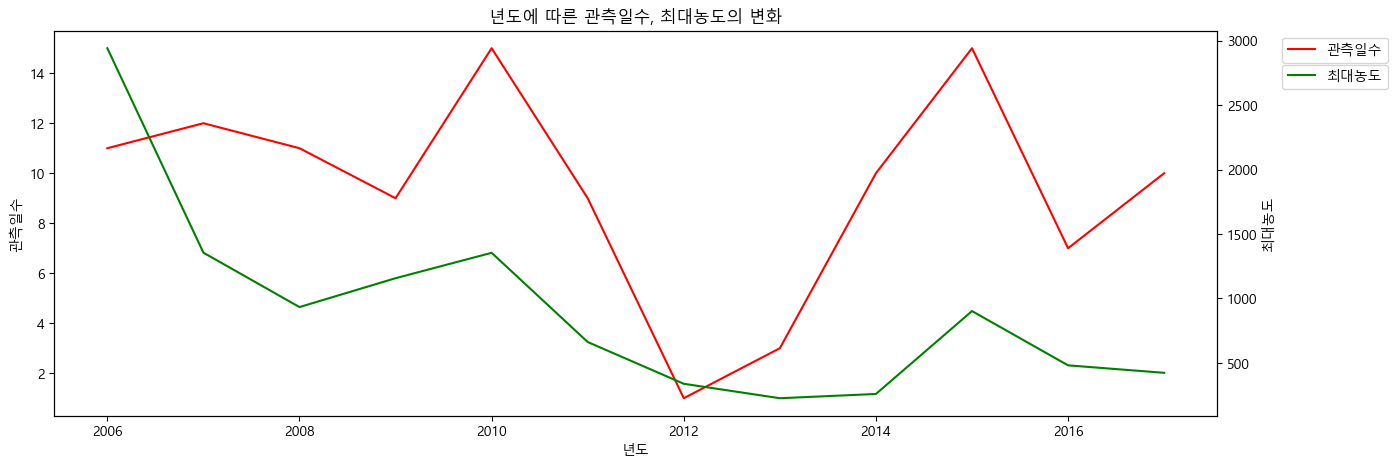

In [89]:
# twinx() 를 이용해서 x축은 같이 사용하고 y는 따로 사용하도록 처리.
plt.figure(figsize=(15, 5))

ax1 = plt.gca()   #관측일수
ax2 = ax1.twinx() # ax1과 x축을 공유하는 새로운 subplot을 생성.

ax1.plot(df['년도'], df['관측일수'], label='관측일수', color='r')
ax2.plot(df['년도'], df['최대농도'], label='최대농도', color='g')

ax1.set_title('년도에 따른 관측일수, 최대농도의 변화')
ax1.set_xlabel('년도')

ax1.set_ylabel('관측일수')
ax2.set_ylabel('최대농도')

ax1.legend(loc='upper left', bbox_to_anchor=(1.05,1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05,0.93))
plt.show()

legend 위치 지정
- 미리 지정된 위치로 잡기.
    - legend(loc="상하위치  좌우위치")  #상하: upper, center, lower, 좌우: left, center, right , 정가운데: "center", "best": 최적의 위치를 알아서 잡아준다.(default)
- 원하는 위치를 직접 설정. 
    - legend(bbox_to_anchor=(x, y), loc="box의 상하, 좌우 위치")
    - bbox_to_anchor
        - 전체 subplot의 x축과 y축의 비율
        ```
        하단: (0, 0), (1, 0)
        상단: (0, 1), (1, 1)
        ```
     - loc -> bbox_to_anchor 좌표지점에 범례 box의 어느 지점을 붙일 것인지 지정.
         - ex) bbox_to_anchor=(1, 1), loc='upper left' :  subplot 의 (1, 1) 지점의 범례박스의 위/왼쪽 점을 맞춘다.

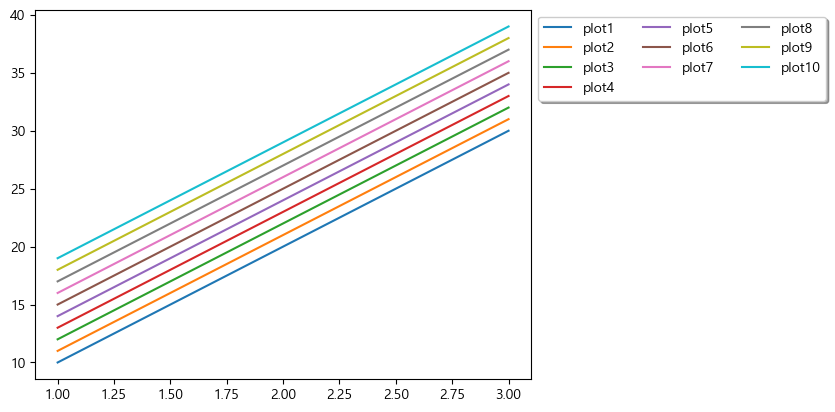

In [94]:
x = [1,2,3]
y = np.array([10,20,30])

plt.plot(x, y, label='plot1')
plt.plot(x, y+1, label='plot2')
plt.plot(x, y+2, label='plot3')
plt.plot(x, y+3, label='plot4')
plt.plot(x, y+4, label='plot5')
plt.plot(x, y+5, label='plot6')
plt.plot(x, y+6, label='plot7')
plt.plot(x, y+7, label='plot8')
plt.plot(x, y+8, label='plot9')
plt.plot(x, y+9, label='plot10')

plt.legend(bbox_to_anchor=(1,1), loc="upper left", 
          ncol=3, shadow=True)
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [95]:
x = range(1, 1001, 50)
y = range(1001, 1, -50)
y2 = range(1, 1001, 50)
print(len(x), len(y))

20 20


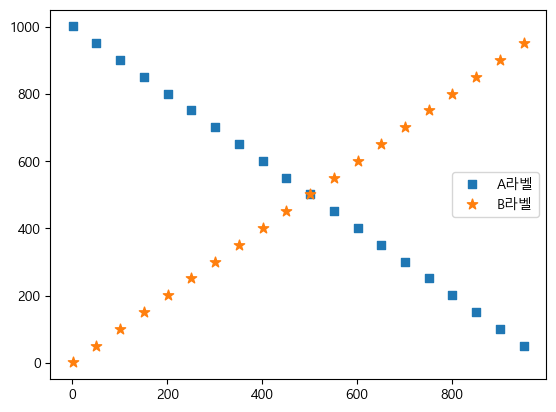

In [107]:
plt.scatter(x, y, marker=',')#, label='A')
plt.scatter(x, y2, marker='*', s=60)# , label='B')

plt.legend(['A라벨', 'B라벨'])
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

## 2.3 산점도 활용

In [108]:
df = pd.read_csv('data/diamonds.csv')
df.shape

(53940, 10)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [110]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

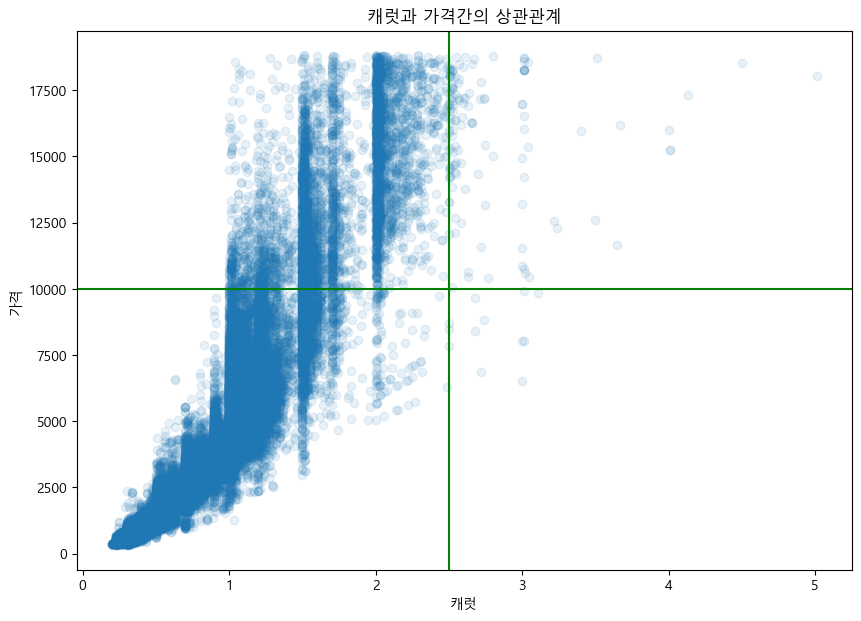

In [120]:
plt.figure(figsize=(10,7))
plt.scatter(df['carat'], df['price'], alpha=0.1)  # x: 원인, y: 결과
plt.axvline(2.5, color='green')
plt.axhline(10000, color='green')
plt.title('캐럿과 가격간의 상관관계')
plt.xlabel('캐럿')
plt.ylabel('가격')
plt.show()

In [116]:
# 상관계수 계산
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

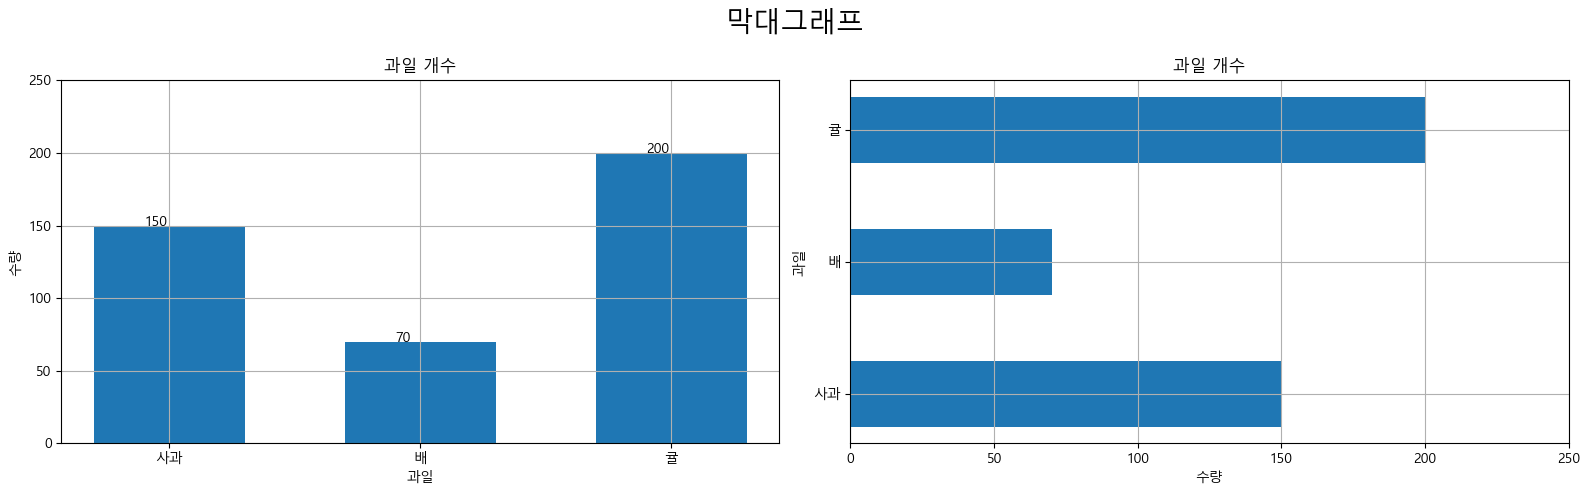

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fruits = ['사과', '배', '귤']
counts = [150, 70, 200]

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.bar(fruits, counts, width=0.6)  #width: 막대의 두께 - 0 ~ 1
# plt.text(x좌표, y좌표, "출력할 텍스트")
# plt.text(1, 100, "안녕하세요")
for x, y in enumerate(counts):
    plt.text(x-0.1, y, str(y))

plt.title('과일 개수')
plt.xlabel('과일')
plt.ylabel('수량')
# y축의 값의 범위를 변경
plt.ylim(0, 250)

plt.grid(True)

plt.subplot(1, 2, 2)
plt.barh(fruits, counts, height=0.5) # height: 막대의 두께.
plt.title('과일 개수')  # subplot(axes)의 title 을 설정
plt.xlabel('수량')
plt.ylabel('과일')
plt.xlim(0, 250) # x축의 값의 범위를 지정

plt.suptitle("막대그래프", fontsize=20)  # figure의 title 을 설정.
plt.grid(True)
plt.tight_layout()
plt.show()

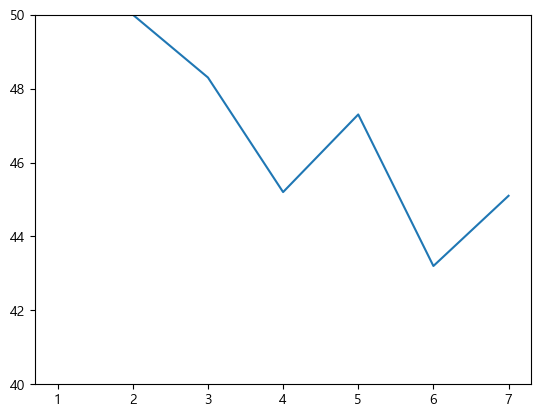

In [141]:
# xticks(), yticks() : 축의 눈금을 재정의 할 때 사용.
# xlim(), ylim(): 축의 값의 범위를 재정의 할 때 사용.
x = [1, 2, 3, 4, 5, 6, 7]
y = [100.0, 50.0, 48.3, 45.2, 47.3, 43.2, 45.1]
plt.plot(x, y)
plt.ylim(40, 50)   # 40 ~ 50 사이의 변화만 확인.
plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [142]:
df = pd.read_excel('data/강수량.xlsx')
df.shape

(4, 10)

In [145]:
df.set_index('계절', inplace=True)

In [146]:
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [148]:
for x, y in enumerate(df[2009]):
    print(x, y)

0 231.3
1 752.0
2 143.1
3 142.3


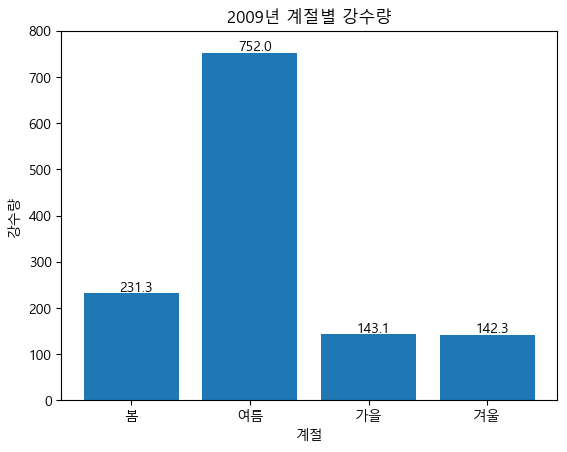

In [157]:
# 2009년 계절별 강수량을 막대그래프로 비교
plt.bar(df.index, df[2009])
plt.title('2009년 계절별 강수량')
# 막대에 강수량을 출력
for x, y in enumerate(df[2009]):
    plt.text(x-0.1, y+5, str(y))
    
plt.ylim(0, 800)   
plt.ylabel('강수량')
plt.xlabel('계절')
plt.show()

In [158]:
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [168]:
df.columns

Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='object')

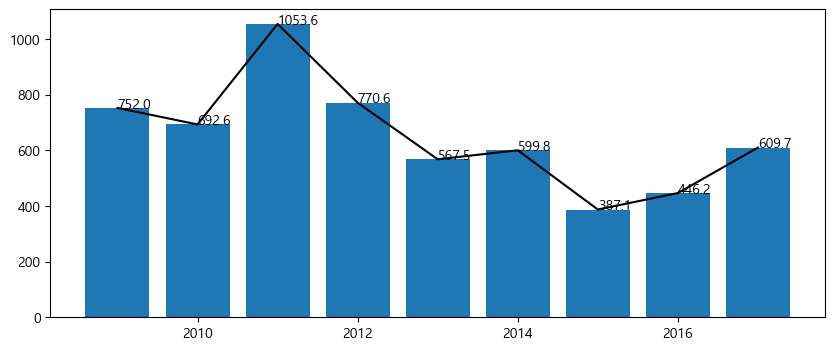

In [170]:
# 여름 년도별 강수량의 변화 => 주관심사-변화 흐름==>line plot
plt.figure(figsize=(10, 4))
plt.plot(df.columns, df.loc['여름'], color='k')
plt.bar(df.columns, df.loc['여름'])
for x, y in zip(df.columns, df.loc['여름']):
    plt.text(x, y, str(y))


plt.show()

In [181]:
df.index

Index(['봄', '여름', '가을', '겨울'], dtype='object', name='계절')

In [190]:
len(df.index)

4

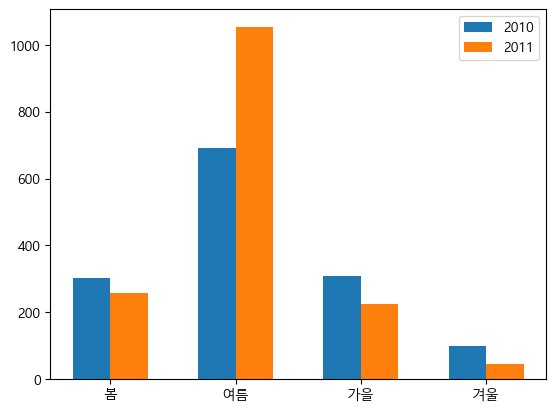

In [191]:
# 2010, 2011 년도 계절별 강수량을 확인 => 누적 막대 그래프
width = 0.3
x = np.arange(4)
plt.bar(x-width/2, df[2010], width=width, label='2010')
plt.bar(x+width/2, df[2011], width=width, label='2011')

plt.xticks(x, labels=df.index)  # X: 눈금의 위치값. LABEL: 눈금 라벨
plt.legend()
plt.show()

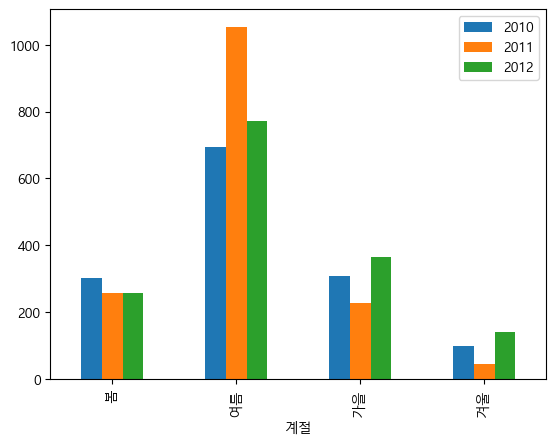

In [197]:
df[[2010, 2011, 2012]].plot(kind='bar')
plt.show()